Experimenting with interval estimates (aka confidence intervals, CI). 
We deal with the case when our measurements are sampled from a normal distribution
$N(\mu, \sigma^2)$.

For simplicity, we start by simplified assumption: we know $\sigma$ in advance and 
only need to find $\mu$. 

In [13]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

import statistics

The function below gives us a random sample of several independent numbers all of the same distribution. 
This is the place to change if we are to deal with a different kind of random variable. 

In [2]:
def sampleX(sigma, num, secretmu):
    """
        Returns a sample of num independent values 
        from a normal random variable of standard deviation sigma
        and unknown, "secret" mean.
    """
    return stats.norm.rvs(loc=secretmu, scale=sigma,size=num)

Below are the functions giving the confidence interval.

In [3]:
def CI(x, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    n = len(x)
    sigma = statistics.stdev(x)
    a = x.mean() - sigma/sqrt(n)*stats.norm.ppf(1-alpha/2)
    b = x.mean() + sigma/sqrt(n)*stats.norm.ppf(1-alpha/2)
    return (a,b)


def CIt(x, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    n = len(x)
    sigma = statistics.stdev(x)
    a = x.mean() - sigma/sqrt(n)*stats.t.ppf(1-alpha/2,n-1)
    b = x.mean() + sigma/sqrt(n)*stats.t.ppf(1-alpha/2,n-1)
    return (a,b)



In [4]:
def estimate_is_correct(interval, secretmu):
    return interval[0] <= secretmu <= interval[1]

In [7]:
secret  = 2.454
correct = 0
alpha = .1
num = 10**4
L = []
D = []
for _ in range(num):
    data = sampleX(2,5,secret)
    D.append(data)
    I = CI(x=data,alpha=alpha)
    L.append(I)
    if estimate_is_correct(I,secret):
        correct = correct + 1
        
print(f"Correct estimates: {correct}, should be about: {(1-alpha)*num}" )

Correct estimates: 8291, should be about: 9000.0


In [9]:
secret  = 2.454
correct = 0
alpha = .1
num = 10**4
L = []
D = []
for _ in range(num):
    data = sampleX(2,5,secret)
    D.append(data)
    I = CIt(x=data,alpha=alpha)
    L.append(I)
    if estimate_is_correct(I,secret):
        correct = correct + 1
        
print(f"Correct estimates: {correct}, should be about: {(1-alpha)*num}" )

Correct estimates: 9023, should be about: 9000.0


Now the same think illustrated by a figure: 
each line represents one run of the experiment, plots the interval we obtain from the measurements (green dots).
The red dotted line is the true value of mean.

For the sake of cleaner picture we only take n=10.

<IPython.core.display.Javascript object>


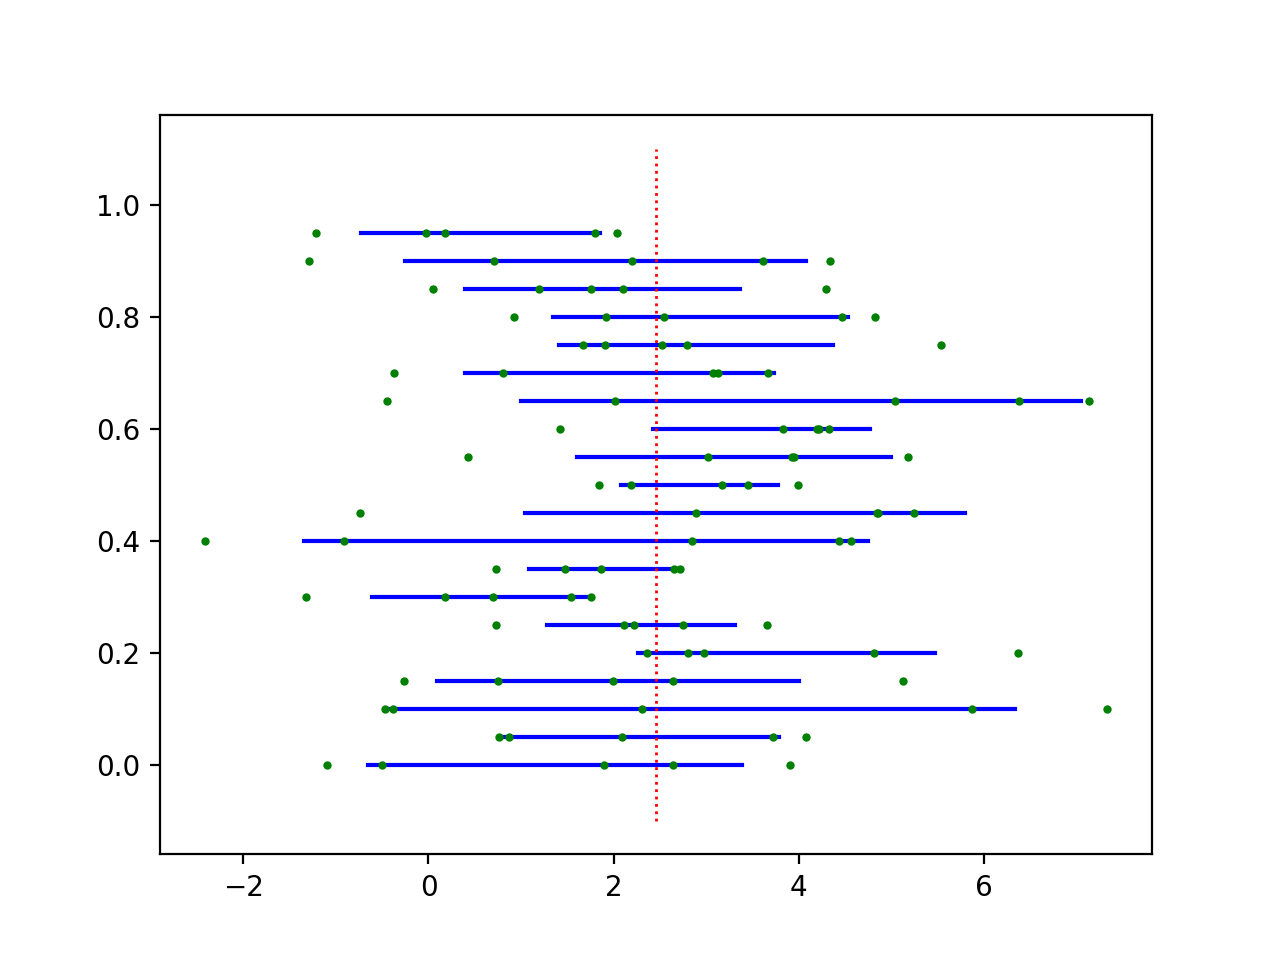

In [11]:
%matplotlib notebook
fig = plt.figure()
n = 20
for i in range(n):
    plt.plot([L[i][0],L[i][1]], [i/n,i/n], 'b-', linewidth=1.5)
    plt.plot(D[i], [i/n for _ in D[i]], 'go', markersize=2)

plt.plot([secret, secret], [-0.1, 1.1], 'r:', linewidth=1)

plt.show()

In [48]:
np.mean((x-x.mean())**2)

5.206899076573839

In [47]:
x.var()

5.206899076573839

In [49]:
len(x)

50

In [51]:
statistics.variance(x)

5.313162323034529

In [52]:
statistics.pvariance(x)

5.206899076573838

In [19]:
data = np.array([1.82, 1.00, 2.50, 3.00, 0.50, 2.97, 1.76, 1.35, 3.41])

In [20]:
data2 = np.array([8.47, 10.91, 10.87, 9.46, 10.40])

In [21]:
np.std(data2)

0.93542289901413

In [28]:
np.std(data2, ddof=1)

1.0458345949527579

In [25]:
sqrt(np.sum((data2-data2.mean())**2)/5)

0.93542289901413

In [29]:
sqrt(np.sum((data2-data2.mean())**2)/4)

1.0458345949527579

In [30]:
statistics.stdev(data2)

1.0458345949527579